**Download Dataset**

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "sagarsudani"
os.environ['KAGGLE_KEY']="1732f22aa502aec3f116d818235fed7c"

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:34<00:00, 144MB/s]
100% 2.29G/2.29G [00:34<00:00, 70.8MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

**Implemantation of model**

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImageDataGenerator

In [68]:
train_dir='/content/chest_xray/train'
test_dir='/content/chest_xray/test'
val_dir='/content/chest_xray/val'

In [69]:
img_height = 128
img_width = 128
batch_size = 32

In [70]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


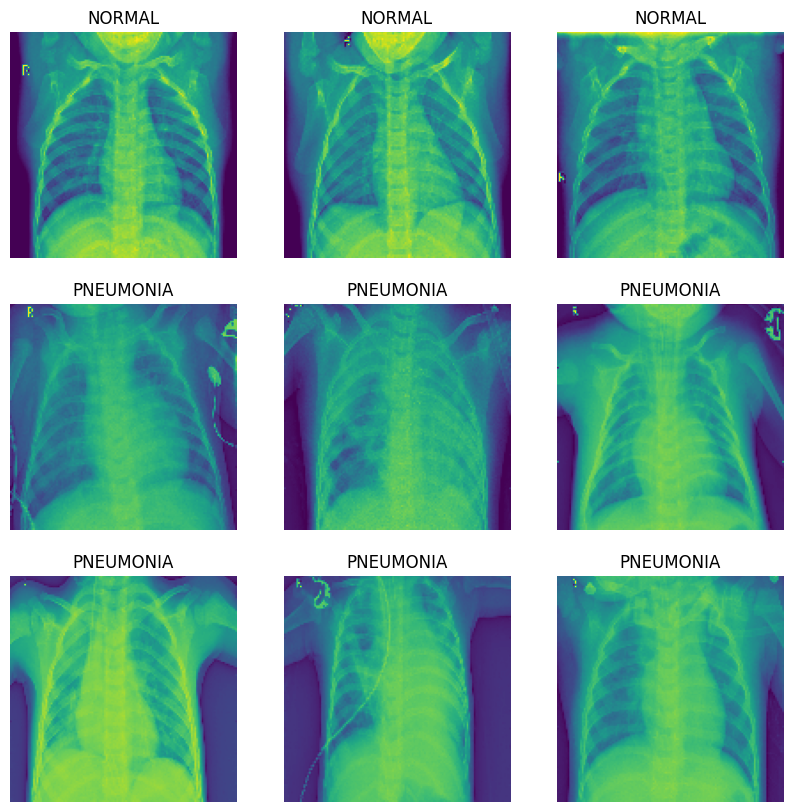

In [73]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [71]:
resnet = ResNet50(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False)

In [61]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width, 1)), # Specify input_shape with 1 channel
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [63]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 800ms/step - accuracy: 0.8640 - loss: 0.3294 - val_accuracy: 0.6875 - val_loss: 0.5321
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 795ms/step - accuracy: 0.9515 - loss: 0.1214 - val_accuracy: 0.8125 - val_loss: 0.3678
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 801ms/step - accuracy: 0.9720 - loss: 0.0789 - val_accuracy: 0.6875 - val_loss: 0.5857
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 793ms/step - accuracy: 0.9690 - loss: 0.0828 - val_accuracy: 0.6875 - val_loss: 0.7511
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 787ms/step - accuracy: 0.9767 - loss: 0.0553 - val_accuracy: 0.7500 - val_loss: 0.4277
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 787ms/step - accuracy: 0.9834 - loss: 0.0431 - val_accuracy: 0.9375 - val_loss: 0.3180
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 784ms/step - accuracy: 0.9827 - loss: 0.0448 - val_accuracy: 0.6875 - val_loss: 0.4966
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 769ms/step - accuracy: 0.9870 -

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,466,056 (9.41 MB)

 Trainable params: 822,018 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,644,038 (6.27 MB)

In [65]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.7802 - loss: 1.7065
Test Accuracy: 75.80%


In [66]:
test_loss, test_acc = model.evaluate(train_ds)
print(f"precision score: {test_acc * 100:.2f}%")

163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 343ms/step - accuracy: 0.9939 - loss: 0.0146
precision score: 99.48%


In [44]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"recall score: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5000 - loss: 0.8391
recall score: 50.00%


In [45]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"f1 score: {test_acc * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.2984 - loss: 1.0622
f1 score: 62.50%
